<a href="https://colab.research.google.com/github/anushChrist/ML_LAB/blob/main/2348504_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# **Checking for missing values**

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

**Imputing missing values using mean.**

In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**Dropping first two columns as they aren't usefull for our case**

In [ ]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

**Dividing Age into different Bins of 18-, 18-25, 26-35, 36-45, 45+**

In [ ]:
bins = [0, 18, 25, 35, 45, 99]
labels = ['18-', '18-25', '26-35', '36-45', '45+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,18-
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,18-25
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,26-35
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,18-25
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,45+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,18-25
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,4,0,0.0,satisfied,45+
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,26-35
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,18-25


**Calculating the Chi-Square Values for Gender and Satisfaction**

In [ ]:
contingency_table = pd.crosstab(df["Gender"], df["satisfaction"])
print(contingency_table)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)

satisfaction      0      1
Gender                    
0             30193  22534
1             28686  22491
Chi-square statistic: 15.44441742614322
P-value: 8.496755458033522e-05


**P-value is really low this shows that we must reject the null-hypothesis and variables are not independent.**

**Plotting a stacked bar graph of the contingency table.**

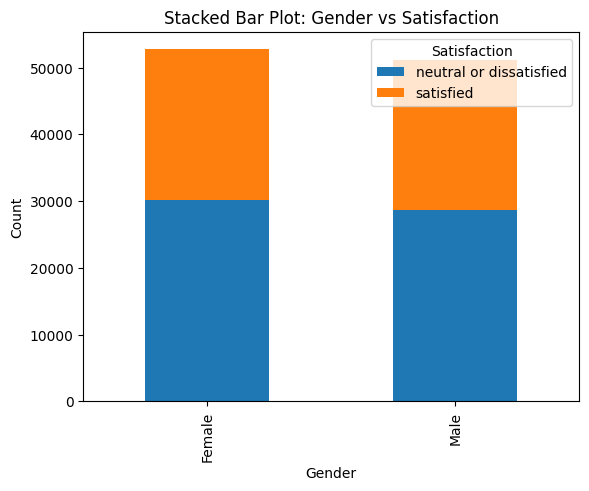

In [ ]:
xy = contingency_table.plot(kind="bar", stacked=True)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Stacked Bar Plot: Gender vs Satisfaction")
plt.legend(title="Satisfaction")

**Pie Chart for Satisfaction**

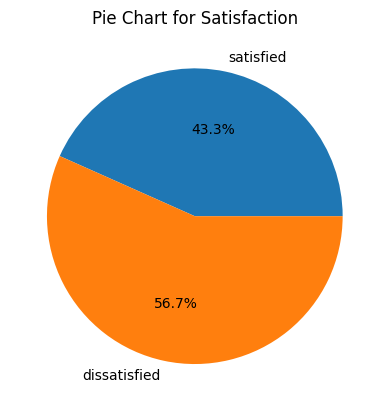

In [ ]:
labels = ['satisfied', 'dissatisfied']
sizes = [df['satisfaction'].value_counts()[1], df['satisfaction'].value_counts()[0]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart for Satisfaction')
plt.show()

**Combining all the Flight Service Rating columns to create a single Flight Rating Column**

In [ ]:
rating_columns = ['Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]
df['Rating'] = df[rating_columns].mean(axis=1)
df[['Rating']].head()

,Rating
0,3.857143
1,2.285714
2,3.714286
3,3.000000
4,3.500000


**Mean Age Rating by Group**

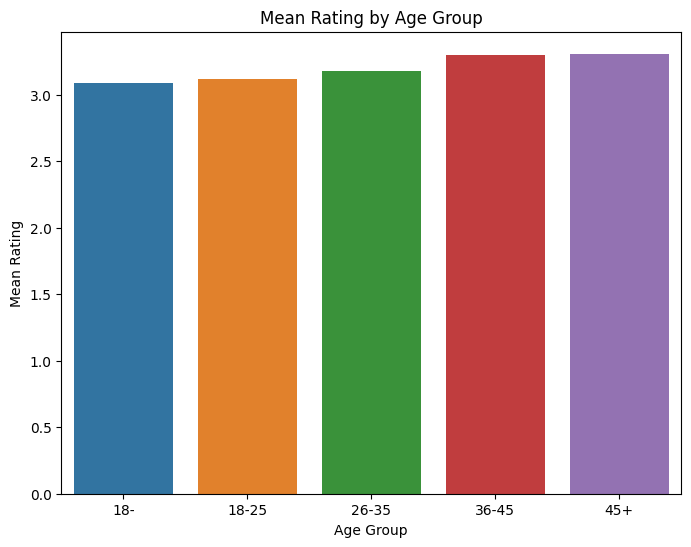

In [ ]:
pivot_table = df.pivot_table(values="Rating", index="age_group", aggfunc="mean")
plt.figure(figsize=(8, 6))
sns.barplot(x=pivot_table.index, y="Rating", data=pivot_table)
plt.xlabel("Age Group")
plt.ylabel("Mean Rating")
plt.title("Mean Rating by Age Group")
plt.xticks(rotation=0)
plt.show()

**Using LabelEncoder to transform categorical values to numerical**

In [ ]:
categorical_col = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'age_group']
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_group,Rating
0,1,0,13,1,2,460,3,4,3,1,...,3,4,4,5,5,25,18.0,0,0,3.857143
1,1,1,25,0,0,235,3,2,3,3,...,5,3,1,4,1,1,6.0,0,1,2.285714
2,0,0,26,0,0,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,1,2,3.714286
3,0,0,25,0,0,562,2,5,5,5,...,5,3,1,4,2,11,9.0,0,1,3.000000
4,1,0,61,0,0,214,3,3,3,3,...,4,4,3,3,3,0,0.0,1,4,3.500000


**Showing the relationship between Rating and Customer Satisfaction**

**Find Pearson Correlation between Rating and Satisfaction**

In [ ]:
correlation = df["Rating"].corr(df["satisfaction"])
correlation

0.4961376977561889

**Positive Correlation**

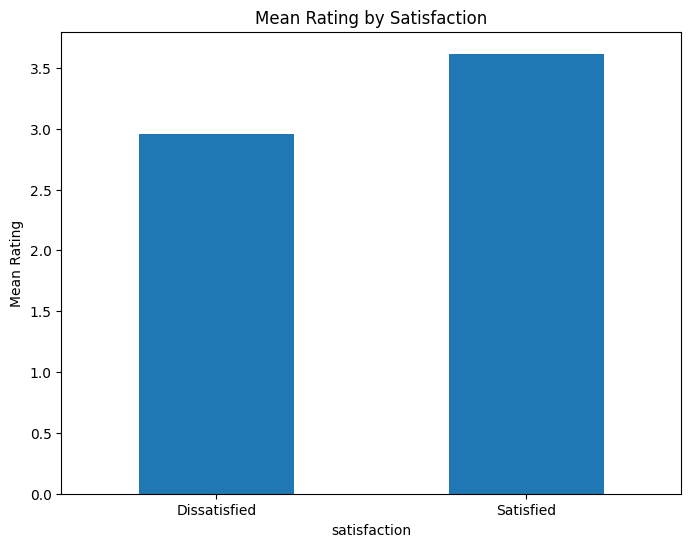

In [ ]:
mean_ratings = df.groupby("satisfaction")["Rating"].mean()
plt.figure(figsize=(8, 6))
mean_ratings.plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("satisfaction")
plt.ylabel("Mean Rating")
plt.title("Mean Rating by Satisfaction")
plt.xticks([0, 1], ["Dissatisfied", "Satisfied"])
plt.show()

**Box Plot for Satisfaction and Rating**

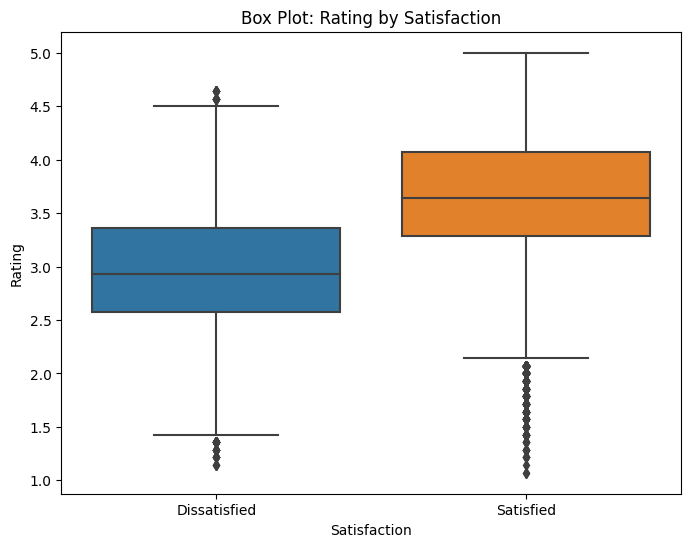

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="satisfaction", y="Rating", data=df)
plt.xlabel("Satisfaction")
plt.ylabel("Rating")
plt.title("Box Plot: Rating by Satisfaction")
plt.xticks([0, 1], ["Dissatisfied", "Satisfied"])
plt.show()

**Customers who give higher rating are generally satistied**

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_group,Rating
0,1,0,13,1,2,460,3,4,3,1,...,3,4,4,5,5,25,18.0,0,0,3.857143
1,1,1,25,0,0,235,3,2,3,3,...,5,3,1,4,1,1,6.0,0,1,2.285714
2,0,0,26,0,0,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,1,2,3.714286
3,0,0,25,0,0,562,2,5,5,5,...,5,3,1,4,2,11,9.0,0,1,3.000000
4,1,0,61,0,0,214,3,3,3,3,...,4,4,3,3,3,0,0.0,1,4,3.500000


**Heatmap to check correlation of Satisfaction with relavant values**

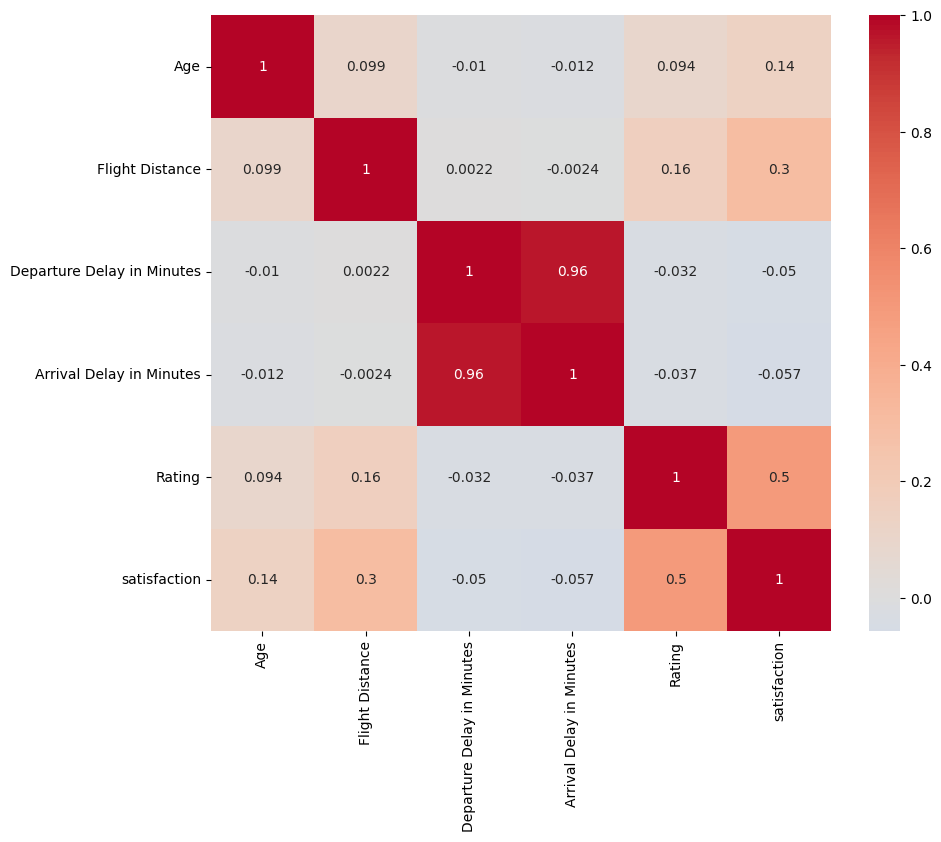

In [ ]:
columns_to_plot = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Rating", "satisfaction"]
correlation_matrix = df[columns_to_plot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

**This shows that greater delay has a negative effect on customer satisfaction.**

**Checking which Services have the highest effect on the Rating**

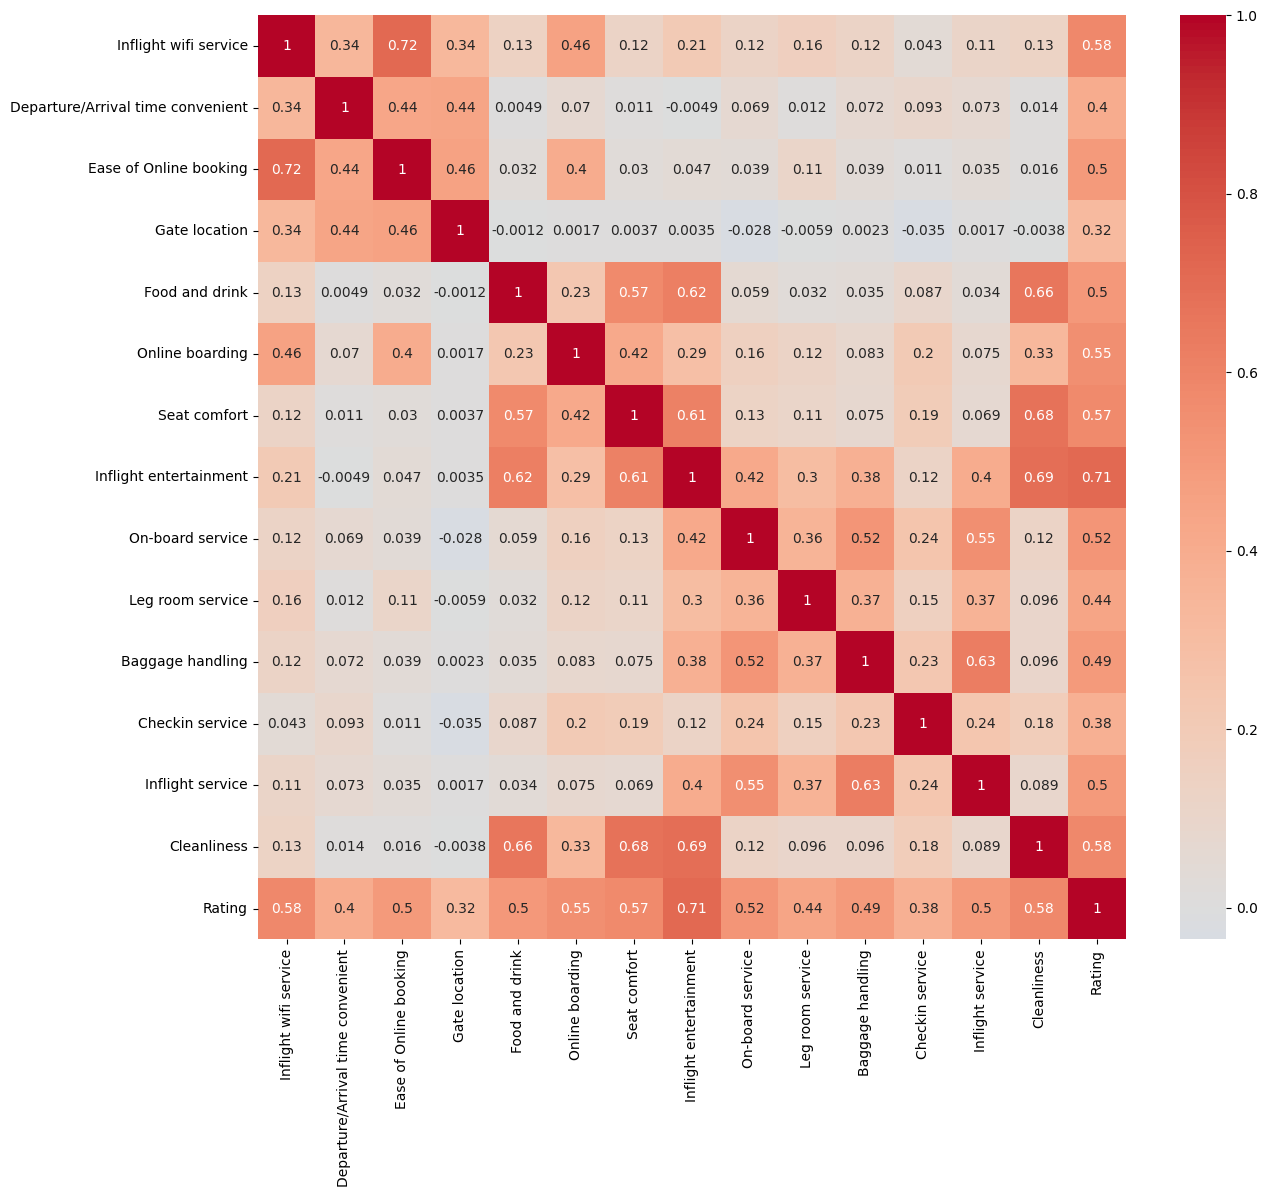

In [ ]:
columns_to_plot = ['Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness', 'Rating']
correlation_matrix = df[columns_to_plot].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

**Checking which factor has the greatest correlation with customer Satisfaction**

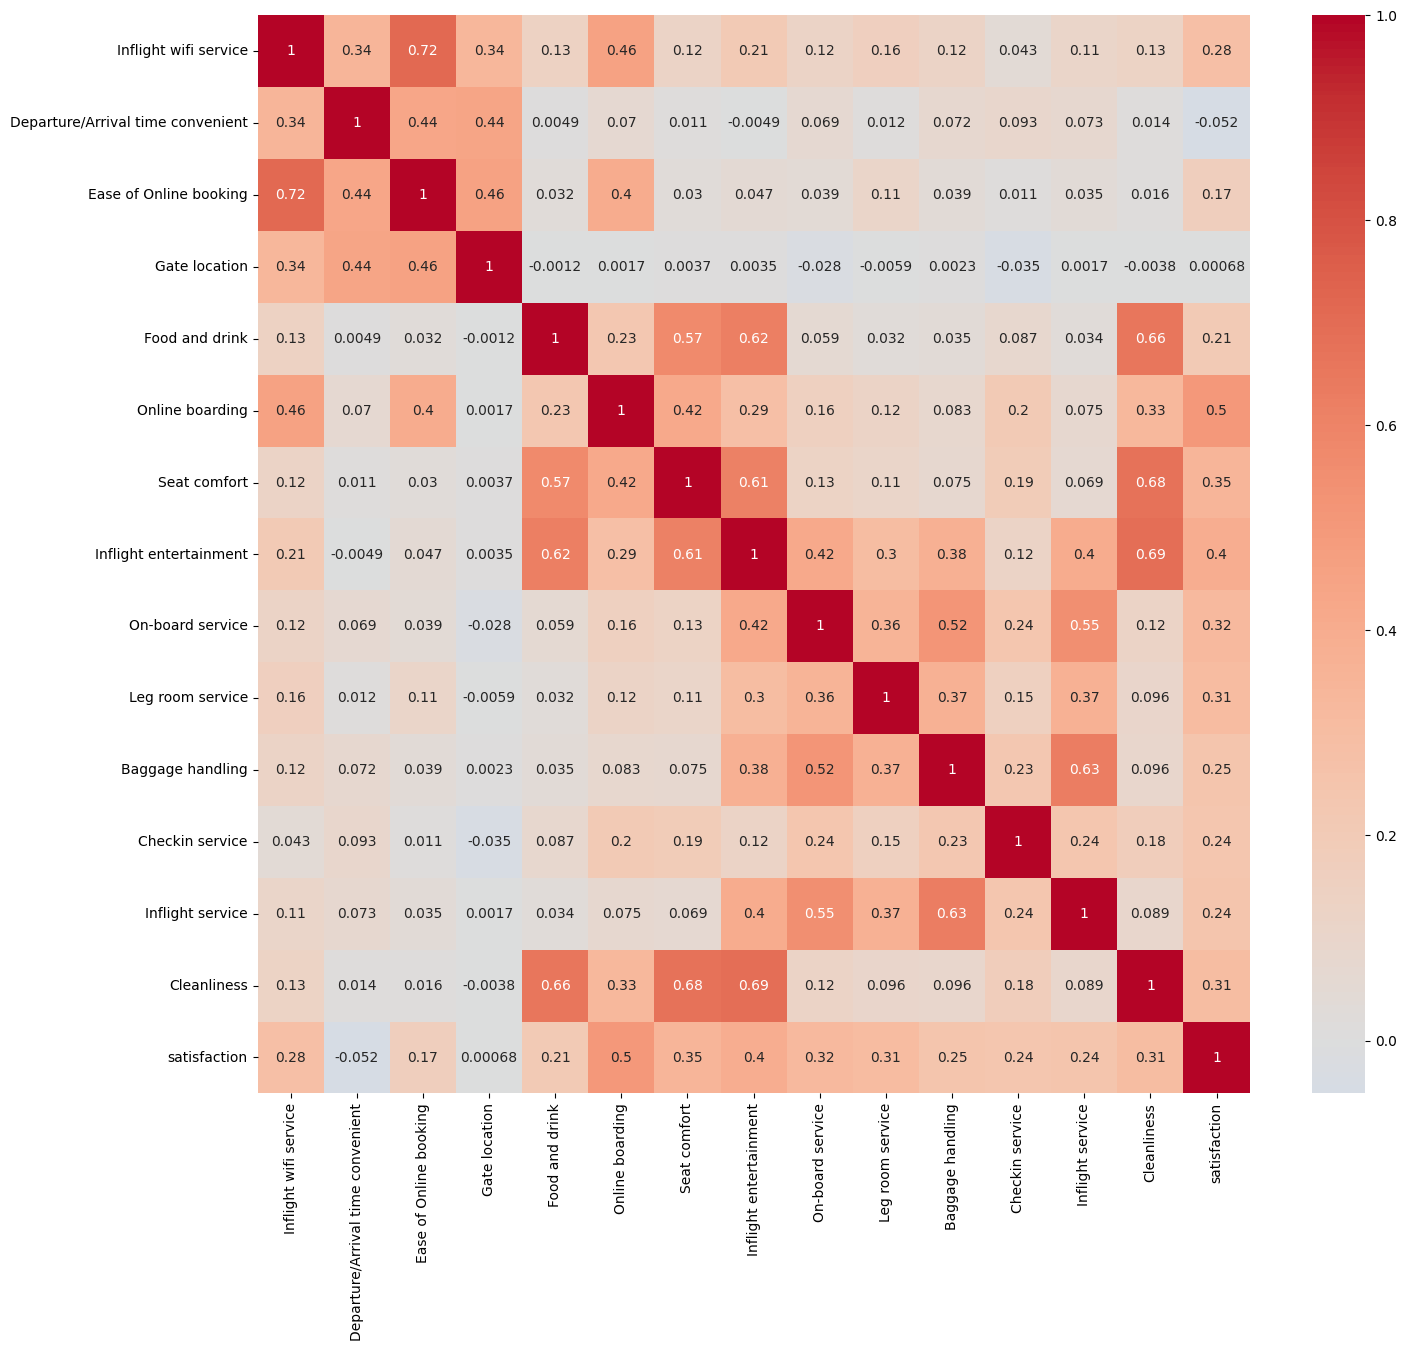

In [ ]:
columns_to_plot =['Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']
correlation_matrix = df[columns_to_plot].corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

**This shows that online boarding and in flight entertainment has higher correlation with customer satifaction.**

**Checking covariance of Age and Rating**

In [ ]:
covariance = df["Age"].cov(df["Rating"])
covariance

0.9386198643136932

**Ploting the relationship between Age and Rating using scatter plot**

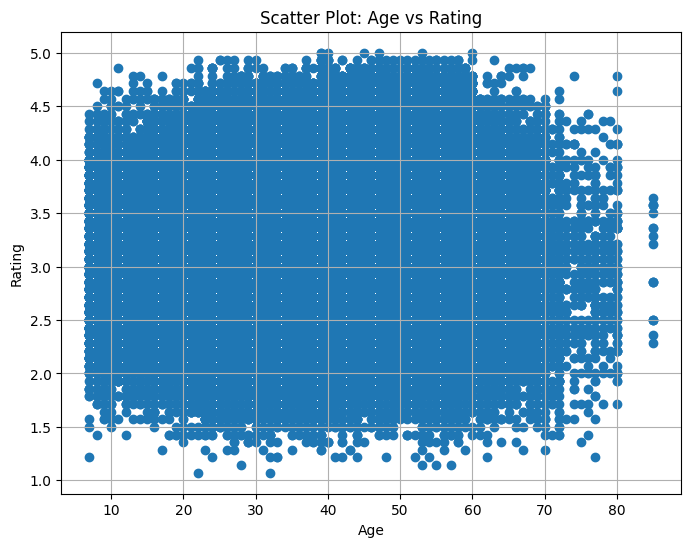

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Rating"])
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Scatter Plot: Age vs Rating")
plt.grid(True)
plt.show()

**Binning rating into a range of 0-5**

In [ ]:
df["Binned Rating"] = np.round(df["Rating"]).astype(int)

**Check Chi-Square for Rating and Customer Loyalty**

In [ ]:
contingency_table = pd.crosstab(df["Binned Rating"], df["Customer Type"])
print(contingency_table)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)

Customer Type      0      1
Binned Rating              
1                117     18
2              12325   3926
3              37630  10297
4              32974   4657
5               1877     83
Chi-square statistic: 1845.6740997911202
P-value: 0.0


**P-value is 0 thus we can reject the null-hypothesis and there variables might not be independent.
This means customer loyalty and satisfaction is dependent on rating.**

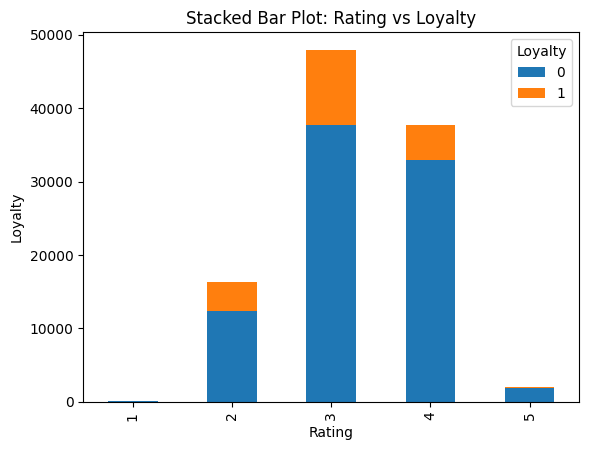

In [ ]:
xy = contingency_table.plot(kind="bar", stacked=True)
plt.xlabel("Rating")
plt.ylabel("Loyalty")
plt.title("Stacked Bar Plot: Rating vs Loyalty")
plt.legend(title="Loyalty")

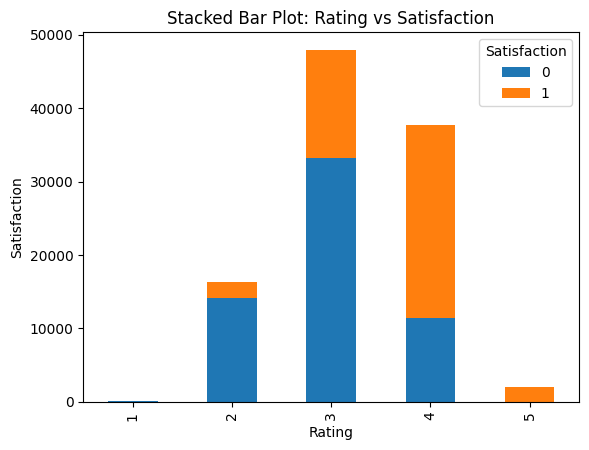

In [ ]:
contingency_table = pd.crosstab(df["Binned Rating"], df["satisfaction"])
xy = contingency_table.plot(kind="bar", stacked=True)
plt.xlabel("Rating")
plt.ylabel("Satisfaction")
plt.title("Stacked Bar Plot: Rating vs Satisfaction")
plt.legend(title="Satisfaction")

**Chi-Square Values for Satisfaction and Ratings**

In [ ]:
rating_columns = ['Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

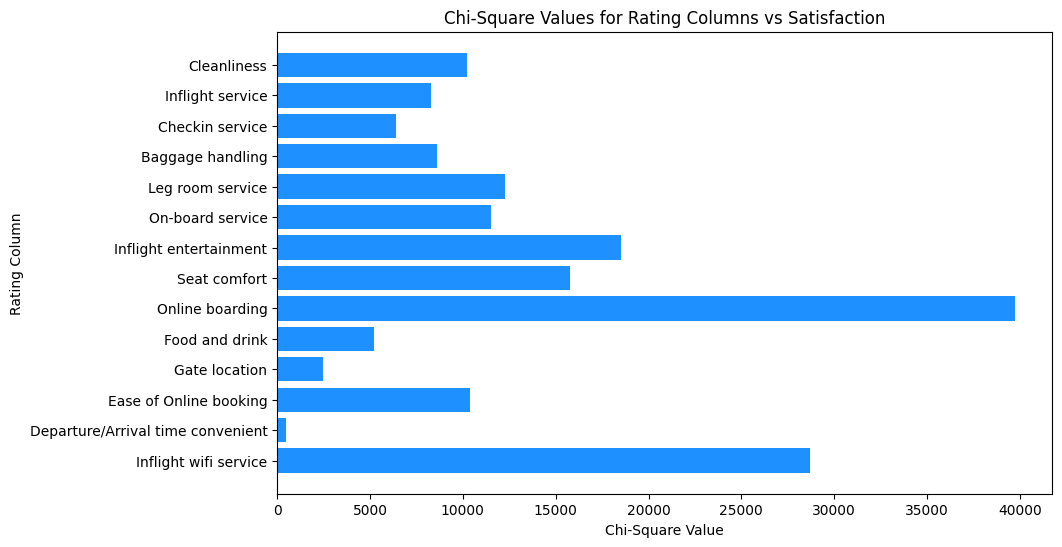

In [ ]:
chi_square_values = []
for column in rating_columns:
    contingency_table = pd.crosstab(df['satisfaction'], df[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_values.append(chi2)
plt.figure(figsize=(10, 6))
plt.barh(rating_columns, chi_square_values, color='dodgerblue')
plt.xlabel('Chi-Square Value')
plt.ylabel('Rating Column')
plt.title('Chi-Square Values for Rating Columns vs Satisfaction')
plt.show()

**Chi-Square values for Loyalty and Ratings**

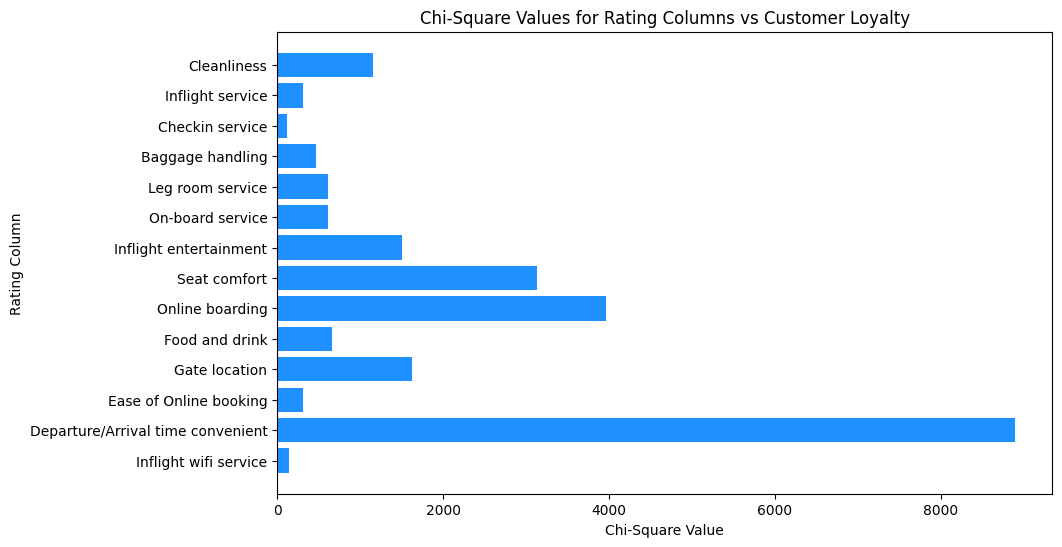

In [ ]:
chi_square_values = []
for column in rating_columns:
    contingency_table = pd.crosstab(df['Customer Type'], df[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_values.append(chi2)
plt.figure(figsize=(10, 6))
plt.barh(rating_columns, chi_square_values, color='dodgerblue')
plt.xlabel('Chi-Square Value')
plt.ylabel('Rating Column')
plt.title('Chi-Square Values for Rating Columns vs Customer Loyalty')
plt.show()

**Checking the relation between delay in departure and delay in arrival**

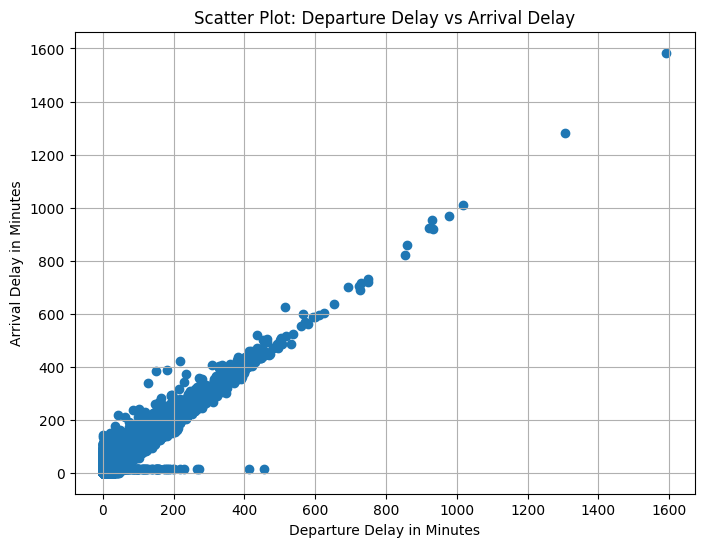

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Departure Delay in Minutes"], df["Arrival Delay in Minutes"])
plt.xlabel("Departure Delay in Minutes")
plt.ylabel("Arrival Delay in Minutes")
plt.title("Scatter Plot: Departure Delay vs Arrival Delay")
plt.grid(True)
plt.show()

In [ ]:
variance_departure_delay = np.var(df["Departure Delay in Minutes"])
variance_arrival_delay = np.var(df["Arrival Delay in Minutes"])

print(variance_departure_delay)
print(variance_arrival_delay)

1461.587692626682
1493.1054883799764


**The variance is simmilar so we might be able to perform t-test (pairs)**

In [ ]:
t_statistic, p_value = ttest_rel(df["Departure Delay in Minutes"], df["Arrival Delay in Minutes"])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -10.916802694523824
P-value: 9.91942003726138e-28


**P-value is very low.
T-stat is negative.
This shows that the mean of Departure Delay is less than that of Arrival Delay and is statistically significant.
We can conclude that the fights don't make up for the departure delay during flight and tend to arrive even later.**

**Check the relation between Flight Distance and change in delay**

**Create a column to store Flight Delay Difference**

In [ ]:
df["Flight Delay Difference"] = df["Arrival Delay in Minutes"] - df["Departure Delay in Minutes"]

In [ ]:
covariance = df["Flight Distance"].cov(df["Flight Delay Difference"])

print("Covariance:", covariance)

Covariance: -175.61001578080723


In [ ]:
correlation = df["Flight Distance"].corr(df["Flight Delay Difference"])
correlation

-0.016428232882232805

**This shows as the flight distance increasees the Flight Delay decreases.**